In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

%matplotlib inline

In [2]:
from google.colab import files
data = files.upload()

Saving train.csv to train.csv


In [3]:
train_data = pd.read_csv("train.csv")
train_data.head()

<ipython-input-3-d15a0847c97f>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
train_data.shape

(100000, 28)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
train_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


# Preprocessing the Data


In [7]:
#change type to category

category_cols = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
train_data[category_cols] = train_data[category_cols].astype('category')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  object  
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  object  
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              8859

In [9]:
train_data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [10]:
train_data.duplicated().sum()

0

In [11]:
#dropping redundant columns

train_data = train_data.drop(['ID', 'Name', 'SSN', 'Type_of_Loan'], axis=1)

In [12]:
cat_list = list(train_data.select_dtypes('category').columns)
for c in cat_list:
  print(c)
  print(train_data[c].value_counts())

Month
April       12500
August      12500
February    12500
January     12500
July        12500
June        12500
March       12500
May         12500
Name: Month, dtype: int64
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_paym

In [13]:
#replacing _ with NaN in Credit_Mix
#replacing !@9#%8 with NaN in Payment_Behaviour

train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].apply(lambda x: np.NaN if x == "!@9#%8" else x)
train_data['Credit_Mix'] = train_data['Credit_Mix'].apply(lambda x: np.NaN if x == "_" else x)

In [14]:
#handle numerical variables

cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt']
for col in cols:
  train_data[col] = train_data[col].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                      else x.replace("_","")).replace("",np.nan)
  train_data[col] = train_data[col].astype('float')

In [15]:
#impute(with mode of data) and clean

train_data['Monthly_Inhand_Salary'] = train_data.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda v: v.mean())
train_data['Monthly_Inhand_Salary'] = train_data['Monthly_Inhand_Salary'].astype('float')

In [16]:
train_data['Num_of_Delayed_Payment'] = train_data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.ffill())
train_data['Num_of_Delayed_Payment'] = train_data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.bfill())

In [17]:
def return_null(val):
  if isinstance(val, str) and "__" in val:
    return np.NaN
  else:
    return val

In [18]:
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].apply(return_null)

In [19]:
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].astype('float')
train_data['Amount_invested_monthly'] = train_data.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda v: v.mean())

In [20]:
train_data['Num_Credit_Inquiries'].quantile([0.10, 0.85, 0.98, 0.985, 0.99])

0.100       1.00
0.850      11.00
0.980      16.00
0.985     298.49
0.990    1109.28
Name: Num_Credit_Inquiries, dtype: float64

In [21]:
train_data['Num_Credit_Inquiries'] = train_data.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda v: v.median())
train_data['Num_Credit_Inquiries'] = train_data['Num_Credit_Inquiries'].astype('float')

In [22]:
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].apply(return_null)
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].astype('float')

In [23]:
train_data['Monthly_Balance'] = train_data.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.mean())

In [24]:
train_data['Payment_Behaviour'] = train_data.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
train_data['Credit_Mix'] = train_data.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.fillna(x.mode()[0]))

<ipython-input-24-137bce6fba80>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_data['Payment_Behaviour'] = train_data.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
<ipython-input-24-137bce6fba80>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_

In [25]:
train_data['Changed_Credit_Limit'] = train_data.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda v: v.mode()[0])

In [26]:
import re
def cal_history_age(val):
  try:
    year, month = 0, 0
    if re.search('year', val, re.IGNORECASE):
      year = int(re.findall('\d+', val)[0])
    if re.search('month', val, re.IGNORECASE):
      month = int(re.findall('\d+', val)[1])
    return year*12+month
  except:
    return np.NaN

In [27]:
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].apply(cal_history_age)

In [28]:
train_data['Credit_History_Age'] = train_data.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
train_data['Credit_History_Age'] = train_data.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].astype('float')

In [29]:
#handling negative values in age columns as well as values greater than 100

def clean_age(x):
  if x > 100 or x <=0:
    return np.NaN
  return x

In [30]:
train_data['Age'] = train_data['Age'].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                    else x.replace("_","")).replace("",np.nan)
train_data['Age'] = train_data['Age'].astype('float')

In [31]:
train_data['Age'] = train_data['Age'].apply(clean_age)
train_data['Age'] = train_data.groupby('Customer_ID')['Age'].transform(lambda v: v.mode()[0])

In [32]:
train_data.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [33]:
cat_cols = ['Credit_Mix', 'Payment_Behaviour']
train_data[cat_cols] = train_data[cat_cols].astype('category')

In [34]:
train_data.shape

(100000, 24)

In [36]:
train_data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.274560,1.764157e+05,4198.468568,17.091280,22.47443,72.466040,3.009960,21.068780,30.690700,10.393543,5.794600,1426.220376,32.285173,221.136220,1403.118217,195.751837,403.120320
std,10.764438,1.429618e+06,3187.031426,117.404834,129.05741,466.422621,62.647879,14.860104,224.881705,6.512529,3.831618,1155.129026,5.116875,99.680454,8306.041270,136.842331,175.470745
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-5.010000,0.000000,0.230000,20.000000,1.000000,0.000000,14.528879,92.841401
25%,24.000000,1.945750e+04,1625.744479,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.500000,3.000000,566.072500,28.052567,144.000000,30.306660,97.690749,284.546710
50%,33.000000,3.757861e+04,3097.016667,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.340000,5.000000,1166.155000,32.305784,219.000000,69.249473,152.081485,338.491580
75%,42.000000,7.279092e+04,5961.664375,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.672500,8.500000,1945.962500,36.496663,302.000000,161.224249,257.566585,465.372970
max,56.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,82331.000000,1005.847285,1349.264887


In [37]:
train_data['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

Min number of bank accounts is negative which is not possible.

In [38]:
train_data['Num_Bank_Accounts'].replace(-1, 0, inplace=True)

In [39]:
train_data['Num_Bank_Accounts'].value_counts(ascending=False).head(15)

6       13001
7       12823
8       12765
4       12186
5       12118
3       11950
9        5443
10       5247
1        4490
0        4349
2        4304
11          9
803         7
1668        5
105         5
Name: Num_Bank_Accounts, dtype: int64

There are account number values more than 800 which are not possible. Replace those with the mode of the columns

In [40]:
train_data['Num_Bank_Accounts'] = train_data['Num_Bank_Accounts'].apply(lambda x: np.NaN if x>10 else x)
train_data['Num_Bank_Accounts'] = train_data.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda v: v.mode()[0])

In [41]:
train_data['Num_Credit_Card'].value_counts(ascending=False).head(15)

5      18459
7      16615
6      16559
4      14030
3      13277
8       4956
10      4860
9       4643
2       2149
1       2132
11        36
0         13
849        8
852        7
183        6
Name: Num_Credit_Card, dtype: int64

In [42]:
train_data['Num_Credit_Card'] = train_data['Num_Credit_Card'].apply(lambda x: np.NaN if x>10 else x)
train_data['Num_Credit_Card'] = train_data.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda v: v.mode()[0])

In [43]:
train_data['Num_Credit_Card'].value_counts(ascending=False).head(15)

5.0     18904
7.0     16984
6.0     16960
4.0     14336
3.0     13576
8.0      5096
10.0     5000
9.0      4736
2.0      2208
1.0      2184
0.0        16
Name: Num_Credit_Card, dtype: int64

In [44]:
train_data['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [45]:
train_data['Interest_Rate'] = train_data['Interest_Rate'].apply(lambda x: np.NaN if x>30 else x)
train_data['Interest_Rate'].replace(np.NaN, 0, inplace=True)

In [48]:
#imputing interest with mode of interest not between 5 and 30

mode_emi = train_data.groupby(['Customer_ID'])['Interest_Rate'].agg(st.mode).apply(lambda x:x[0][0])
train_data.drop("Interest_Rate",axis=1,inplace=True)
train_data = pd.merge(left=train_data,right=mode_emi,how="left",left_on="Customer_ID",right_index=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py:1668: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)


In [49]:
train_data['Num_of_Loan'].value_counts(ascending=False).head(15)

 3.0       15104
 2.0       15032
 4.0       14743
 0.0       10930
 1.0       10606
 6.0        7803
 7.0        7344
 5.0        7197
-100.0      3876
 9.0        3702
 8.0        3191
 1150.0        4
 1228.0        3
 1480.0        3
 288.0         3
Name: Num_of_Loan, dtype: int64

In [50]:
#number of loan cannot be negative, one value says -100

train_data['Num_of_Loan'] = train_data['Num_of_Loan'].apply(lambda x: np.NaN if (x>10 or x<0) else x)
train_data['Num_of_Loan'] = train_data.groupby('Customer_ID')['Num_of_Loan'].transform(lambda v: v.mode()[0])

In [51]:
train_data['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         30.690700
std         224.881705
min          -3.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [52]:
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].apply(lambda x: np.NaN if (x>30 or x<0) else x)
train_data['Num_of_Delayed_Payment'] = train_data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.mode()[0])

In [53]:
train_data['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [54]:
mode_emi = train_data.groupby(['Customer_ID'])['Total_EMI_per_month'].agg(st.mode).apply(lambda x:x[0][0])

train_data.drop("Total_EMI_per_month",axis=1,inplace=True)
train_data = pd.merge(left=train_data,right=mode_emi,how="left",left_on="Customer_ID",right_index=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py:1668: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)


In [55]:
train_data['Total_EMI_per_month'].describe()

count    100000.000000
mean        105.543371
std         125.810030
min           0.000000
25%          29.049047
50%          66.033915
75%         145.582332
max        1779.103254
Name: Total_EMI_per_month, dtype: float64

In [56]:
train_data['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [58]:
nv = round(train_data.isna().sum()/train_data.shape[0]*100 , 4)
nv[nv > 0]

Series([], dtype: float64)

In [60]:
train_data.shape

(100000, 24)

In [61]:
train_data.drop(['Customer_ID', 'Month', 'Occupation'], axis=1, inplace=True)

In [ ]:
train_data

In [62]:
cat_df = train_data.select_dtypes('category')
num_df = train_data.select_dtypes(exclude='category')

In [63]:
for c in cat_df.columns:
  print(c)
  print(train_data[c].unique())
  print()

Credit_Mix
['Good', 'Standard', 'Bad']
Categories (3, object): ['Bad', 'Good', 'Standard']

Payment_of_Min_Amount
['No', 'NM', 'Yes']
Categories (3, object): ['NM', 'No', 'Yes']

Payment_Behaviour
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments']
Categories (6, object): ['High_spent_Large_value_payments', 'High_spent_Medium_value_payments',
                         'High_spent_Small_value_payments', 'Low_spent_Large_value_payments',
                         'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments']

Credit_Score
['Good', 'Standard', 'Poor']
Categories (3, object): ['Good', 'Poor', 'Standard']



In [64]:
#Encoding

train_data['Credit_Mix'] = train_data['Credit_Mix'].map({'Bad': 0, 'Standard': 1, 'Good': 2})
train_data['Credit_Score'] = train_data['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

In [65]:
dummy_df = pd.get_dummies(train_data[['Payment_Behaviour', 'Payment_of_Min_Amount']], drop_first=True)

train_data = pd.concat([train_data, dummy_df], axis=1)
train_data = train_data.drop(['Payment_Behaviour', 'Payment_of_Min_Amount'], axis=1)

In [66]:
train_data['Credit_Mix'] = train_data['Credit_Mix'].astype('int')
train_data['Credit_Score'] = train_data['Credit_Score'].astype('int')

In [67]:
train_data.shape

(100000, 26)

In [68]:
train_data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Interest_Rate,Total_EMI_per_month,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,23.0,19114.12,1824.843333,3.0,4.0,4.0,3,4.0,11.27,4.0,...,2,3.0,49.574949,0,1,0,0,0,1,0
1,23.0,19114.12,1824.843333,3.0,4.0,4.0,-1,4.0,11.27,4.0,...,2,3.0,49.574949,0,0,1,0,0,1,0
2,23.0,19114.12,1824.843333,3.0,4.0,4.0,3,4.0,11.27,4.0,...,2,3.0,49.574949,0,0,0,1,0,1,0
3,23.0,19114.12,1824.843333,3.0,4.0,4.0,5,4.0,11.27,4.0,...,2,3.0,49.574949,0,0,0,0,1,1,0
4,23.0,19114.12,1824.843333,3.0,4.0,4.0,6,4.0,11.27,4.0,...,2,3.0,49.574949,1,0,0,0,0,1,0


# Splitting and training the data

In [69]:
X = train_data.drop('Credit_Score', axis=1)
y = train_data['Credit_Score']

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 0)

In [77]:
sc = StandardScaler()

In [ ]:
num_columns = list(num_train_data.columns)

In [78]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [85]:
X.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance', 'Interest_Rate',
       'Total_EMI_per_month',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes'],
      dtype='object')

In [86]:
columns_names = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance', 'Interest_Rate',
       'Total_EMI_per_month',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes']

In [88]:
X_train = pd.DataFrame(data = X_train, columns = columns_names)
X_test = pd.DataFrame(data = X_test, columns = columns_names)

**NN Model 1**

In [79]:
def visualize_train_result(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

#     epochs_range = range(epochs)

    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
#     plt.plot(epochs_range, acc, label='Training mse')
#     plt.plot(epochs_range, val_acc, label='Validation mse')
    plt.plot(acc, label='Training mse')
    plt.plot(val_acc, label='Validation mse')

    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
#     plt.plot(epochs_range, loss, label='Training Loss')
#     plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras import callbacks

In [81]:
model = Sequential()

model.add(Dense(256,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(3, activation="softmax"))

In [82]:
LR = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, cooldown=1, verbose=1) # write the REducelronplateau code here

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
)

model.compile(
    optimizer=Adam(learning_rate=0.1),
    loss="categorical_crossentropy",
    metrics=['accuracy', Precision(), Recall()]
)

In [104]:
epochs=50
history = model.fit(
    np.array(X_train.values),to_categorical(y_train),
    epochs=epochs,
    validation_split=0.2,
    batch_size=128,
    callbacks=[early_stopping]
)

Epoch 1/50
469/469 [==============================] - 5s 10ms/step - loss: 0.7131 - accuracy: 0.6809 - precision: 0.7217 - recall: 0.6171 - val_loss: 0.6735 - val_accuracy: 0.6990 - val_precision: 0.7607 - val_recall: 0.6135
Epoch 2/50
469/469 [==============================] - 8s 16ms/step - loss: 0.7116 - accuracy: 0.6819 - precision: 0.7226 - recall: 0.6208 - val_loss: 0.7267 - val_accuracy: 0.5811 - val_precision: 0.6089 - val_recall: 0.5223
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.7111 - accuracy: 0.6829 - precision: 0.7225 - recall: 0.6208 - val_loss: 0.6960 - val_accuracy: 0.6681 - val_precision: 0.7392 - val_recall: 0.5777
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.7058 - accuracy: 0.6849 - precision: 0.7250 - recall: 0.6230 - val_loss: 0.7149 - val_accuracy: 0.6723 - val_precision: 0.6903 - val_recall: 0.6540
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.7089 - accuracy: 0.6842 -

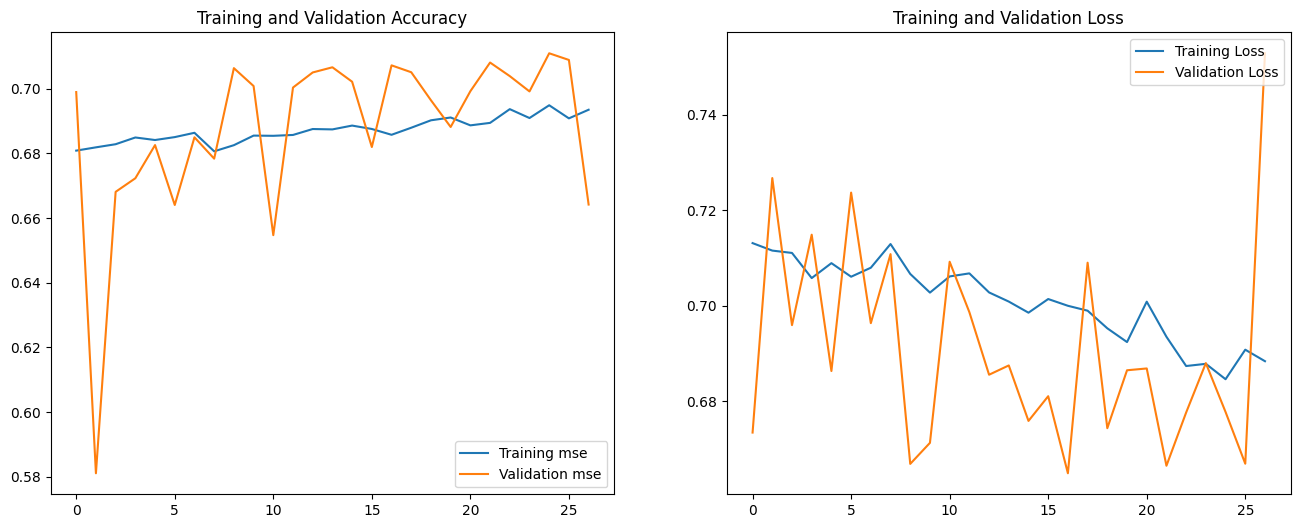

In [105]:
visualize_train_result(history, epochs)

In [106]:
y_pred = model.predict(X_test.values)
y_pred = np.argmax(y_pred, axis=1)

782/782 [==============================] - 1s 2ms/step


In [107]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [108]:
print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71      7250
           1       0.69      0.73      0.71     13293
           2       0.75      0.24      0.37      4457

    accuracy                           0.67     25000
   macro avg       0.69      0.60      0.60     25000
weighted avg       0.68      0.67      0.65     25000



In [102]:
cm = confusion_matrix(y_test.values, y_pred)
cm

array([[ 4692,  2497,    61],
       [ 1532, 11430,   331],
       [  121,  3314,  1022]])

**NN model 2**

In [109]:
model = Sequential()

model.add(Dense(1024,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
# model.add(BatchNormalization())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
# model.add(BatchNormalization())

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(3, activation="softmax"))

In [110]:
LR = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, cooldown=1, verbose=1) # write the REducelronplateau code here

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
)

model.compile(
    optimizer=Adam(learning_rate=0.1),
    loss="categorical_crossentropy",
    metrics=['accuracy', Precision(), Recall()]
)

In [111]:
with tf.device("/gpu:0"):
    epochs=50
    history = model.fit(
        np.array(X_train.values),to_categorical(y_train),
        epochs=epochs,
        validation_split=0.2,
        batch_size=64,
        callbacks=[early_stopping, LR]
    )

Epoch 1/50
938/938 [==============================] - 28s 28ms/step - loss: 0.8108 - accuracy: 0.6288 - precision_1: 0.6530 - recall_1: 0.5812 - val_loss: 0.7584 - val_accuracy: 0.6271 - val_precision_1: 0.6517 - val_recall_1: 0.5990 - lr: 0.1000
Epoch 2/50
938/938 [==============================] - 26s 27ms/step - loss: 0.7667 - accuracy: 0.6549 - precision_1: 0.6873 - recall_1: 0.6044 - val_loss: 0.7106 - val_accuracy: 0.6869 - val_precision_1: 0.7173 - val_recall_1: 0.6523 - lr: 0.1000
Epoch 3/50
938/938 [==============================] - 18s 20ms/step - loss: 0.7613 - accuracy: 0.6599 - precision_1: 0.6940 - recall_1: 0.6040 - val_loss: 0.7188 - val_accuracy: 0.6983 - val_precision_1: 0.7222 - val_recall_1: 0.6642 - lr: 0.1000
Epoch 4/50
938/938 [==============================] - 19s 21ms/step - loss: 0.7498 - accuracy: 0.6620 - precision_1: 0.6988 - recall_1: 0.6044 - val_loss: 0.7028 - val_accuracy: 0.6829 - val_precision_1: 0.7262 - val_recall_1: 0.6139 - lr: 0.1000
Epoch 5/50
9

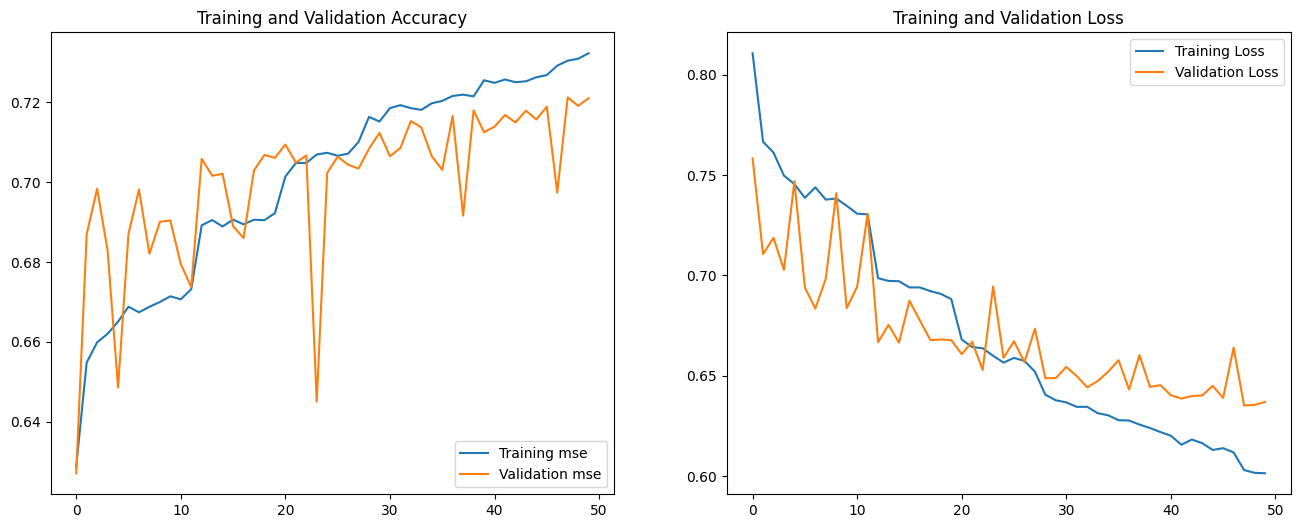

In [112]:
visualize_train_result(history, epochs)

In [113]:
y_pred = model.predict(X_test.values)
y_pred = np.argmax(y_pred, axis=1)

782/782 [==============================] - 3s 3ms/step


In [114]:
print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      7250
           1       0.77      0.75      0.76     13293
           2       0.58      0.72      0.65      4457

    accuracy                           0.73     25000
   macro avg       0.70      0.72      0.71     25000
weighted avg       0.73      0.73      0.73     25000



In [115]:
cm = confusion_matrix(y_test.values, y_pred)
cm

array([[4996, 1771,  483],
       [1543, 9935, 1815],
       [  70, 1165, 3222]])